# Data exploration

In [47]:
import matplotlib.pyplot as plt
import pandas as pd
import os
import seaborn as sns
import numpy as np

pd.set_option("display.max_columns", None)

In [8]:
cwd_path = os.getcwd()
root_path = os.path.join(cwd_path, "..")
print("Root path:", root_path)

Root path: /Users/lluccardoner/PycharmProjects/form-completion-rate/notebooks/..


## Load data

In [10]:
data_path = os.path.join(root_path, "resources/dataset/completion_rate.csv")
data = pd.read_csv(data_path)
print("Dataset has {} rows".format(len(data)))

Dataset has 1031284 rows


Create target column

In [11]:
data["CR"] = data["submissions"] / data["views"]

Print data info

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1031284 entries, 0 to 1031283
Data columns (total 51 columns):
form_id        1031284 non-null int64
views          1031284 non-null int64
submissions    1031284 non-null int64
feat_01        1031284 non-null float64
feat_02        1031284 non-null float64
feat_03        1031284 non-null float64
feat_04        1031284 non-null float64
feat_05        1031284 non-null float64
feat_06        1031284 non-null float64
feat_07        1031284 non-null float64
feat_08        1031284 non-null float64
feat_09        1031284 non-null float64
feat_10        1031284 non-null float64
feat_11        1031284 non-null float64
feat_12        1031284 non-null float64
feat_13        1031284 non-null float64
feat_14        1031284 non-null float64
feat_15        1031284 non-null float64
feat_16        1031284 non-null float64
feat_17        1031284 non-null float64
feat_18        1031284 non-null float64
feat_19        1031284 non-null float64
feat_20      

### Main columns statistics

In [13]:
main_cols = ["views", "submissions", "CR"]

In [32]:
stats = data[main_cols].describe(percentiles=[.25,.5,.75,.9])
stats

,views,submissions,CR
count,1.031284e+06,1.031284e+06,1.031284e+06
mean,9.395541e+02,3.224132e+02,5.149026e-01
std,2.674871e+04,8.507656e+03,2.233476e-01
min,1.000000e+00,0.000000e+00,0.000000e+00
25%,3.600000e+01,1.700000e+01,3.523876e-01
50%,7.900000e+01,3.300000e+01,5.303030e-01
75%,2.260000e+02,9.000000e+01,6.847458e-01
90%,7.820000e+02,3.050000e+02,8.000000e-01
max,1.226718e+07,6.754385e+06,1.000000e+00


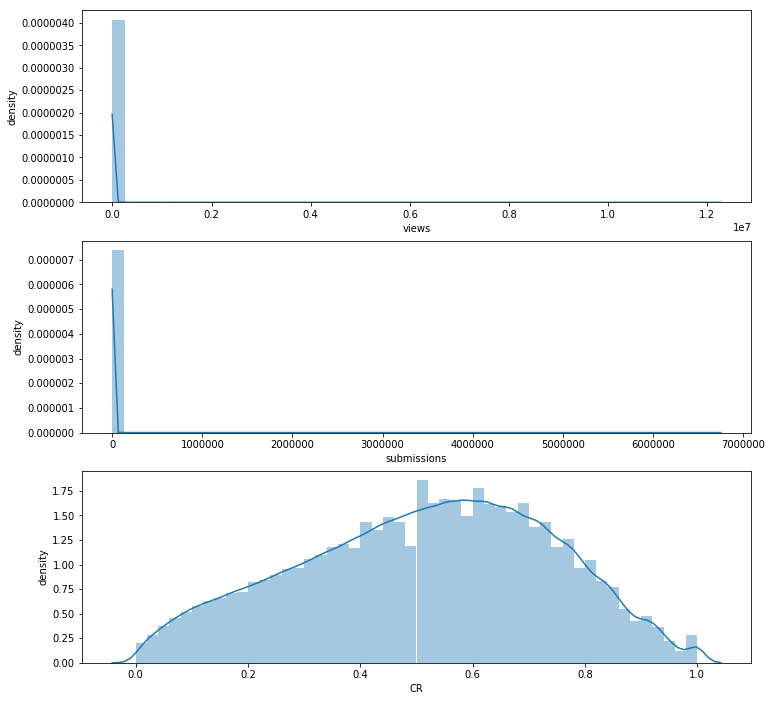

In [38]:
f, axes = plt.subplots(len(main_cols), 1, figsize=(12, 12))
for i, col in enumerate(main_cols):   
    sns.distplot( data[col], ax=axes[i], norm_hist=True)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("density")

Plot up to percentile 90 for views and submissions for better visualization

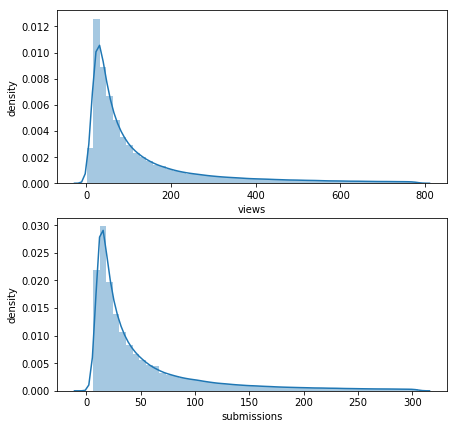

In [41]:
f, axes = plt.subplots(len(main_cols[:-1]), 1, figsize=(7, 7))
for i, col in enumerate(main_cols[:-1]):
    pct_90 = stats[col]["90%"]
    s = data[col]
    sns.distplot(s[s <= pct_90], ax=axes[i], norm_hist=True)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("density")

### Feature columns statistics

In [42]:
feature_cols = [c for c in data.columns if 'feat' in c]

In [56]:
stats_features = data[feature_cols].describe(percentiles=[.25,.5,.75,.9])
stats_features

,feat_01,feat_02,feat_03,feat_04,feat_05,feat_06,feat_07,feat_08,feat_09,feat_10,feat_11,feat_12,feat_13,feat_14,feat_15,feat_16,feat_17,feat_18,feat_19,feat_20,feat_21,feat_22,feat_23,feat_24,feat_25,feat_26,feat_27,feat_28,feat_29,feat_30,feat_31,feat_32,feat_33,feat_34,feat_35,feat_36,feat_37,feat_38,feat_39,feat_40,feat_41,feat_42,feat_43,feat_44,feat_45,feat_46,feat_47
count,1.031284e+06,1.031284e+06,1.031284e+06,1.031284e+06,1.031284e+06,1.031284e+06,1.031284e+06,1.031284e+06,1.031284e+06,1.031284e+06,1.031284e+06,1.031284e+06,1.031284e+06,1.031284e+06,1.031284e+06,1.031284e+06,1.031284e+06,1.031284e+06,1.031284e+06,1.031284e+06,1.031284e+06,1.031284e+06,1.031284e+06,1.031284e+06,1.031284e+06,1.031284e+06,1.031284e+06,1.031284e+06,1.031284e+06,1.031284e+06,1.031284e+06,1.031284e+06,1.031284e+06,1.031284e+06,1.031284e+06,1.031284e+06,1.031284e+06,1.031284e+06,1.031284e+06,1.031284e+06,1.031284e+06,1.031284e+06,1.031284e+06,1.031284e+06,1.031284e+06,1.031284e+06,1.031284e+06
mean,1.954515e-01,3.749122e-01,5.497322e-02,1.024936e-03,1.449494e-01,1.769047e-01,8.513950e-01,9.605598e-02,6.605736e-01,1.356561e-02,1.287288e-01,2.684905e-02,2.474779e-02,2.240372e-01,1.204615e-02,8.129090e-02,1.846494e-01,6.739463e-02,2.992037e-01,2.134233e-03,3.608233e+00,6.898788e-01,1.732705e+00,3.993177e-02,3.567659e-01,9.742224e-03,7.710291e-02,1.746056e-01,1.803868e-01,5.131399e-01,1.103479e-02,1.524604e-02,4.948084e-01,1.769047e-01,1.322332e-02,2.399048e-01,1.023258e-01,2.399572e-01,5.879176e-02,1.948299e-01,1.551163e-01,2.771681e-01,3.399791e-01,4.803430e-02,8.318746e-01,6.470032e-01,4.468738e+00
std,3.965481e-01,9.334260e-01,4.403415e-01,3.307117e-02,4.802633e-01,9.472932e-01,1.883366e+00,3.109951e-01,1.240156e+00,1.338135e-01,5.399464e-01,2.841987e-01,2.035444e-01,8.295350e-01,1.293744e-01,6.932297e-01,8.240480e-01,4.599509e-01,1.379196e+00,4.614845e-02,4.251488e+00,1.637072e+00,2.948574e+00,3.085834e-01,9.883358e-01,2.338512e-01,5.387110e-01,6.190076e-01,6.551765e-01,1.494264e+00,2.012111e-01,2.207462e-01,1.702317e+00,9.472932e-01,1.649177e-01,1.266305e+00,8.557466e-01,1.266072e+00,4.198431e-01,1.173311e+00,7.668222e-01,5.640830e-01,6.157581e-01,2.834470e-01,4.302039e+00,6.045358e+00,1.085162e+01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000

We can see that feat_01 and feat_20 are binary 

In [60]:
data[feature_cols].nunique()

feat_01      2
feat_02     46
feat_03     44
feat_04      5
feat_05     38
feat_06     59
feat_07     79
feat_08     14
feat_09     62
feat_10     12
feat_11     32
feat_12     30
feat_13     22
feat_14     51
feat_15     12
feat_16     69
feat_17     56
feat_18     39
feat_19     75
feat_20      2
feat_21    155
feat_22     78
feat_23    119
feat_24     28
feat_25     66
feat_26     32
feat_27     38
feat_28     38
feat_29     41
feat_30     74
feat_31     26
feat_32     27
feat_33     83
feat_34     59
feat_35     18
feat_36     72
feat_37     60
feat_38     72
feat_39     38
feat_40     69
feat_41     52
feat_42     35
feat_43     39
feat_44     25
feat_45    218
feat_46    287
feat_47    326
dtype: int64

There are no missing values

In [69]:
data[feature_cols].isna().any().any()

False

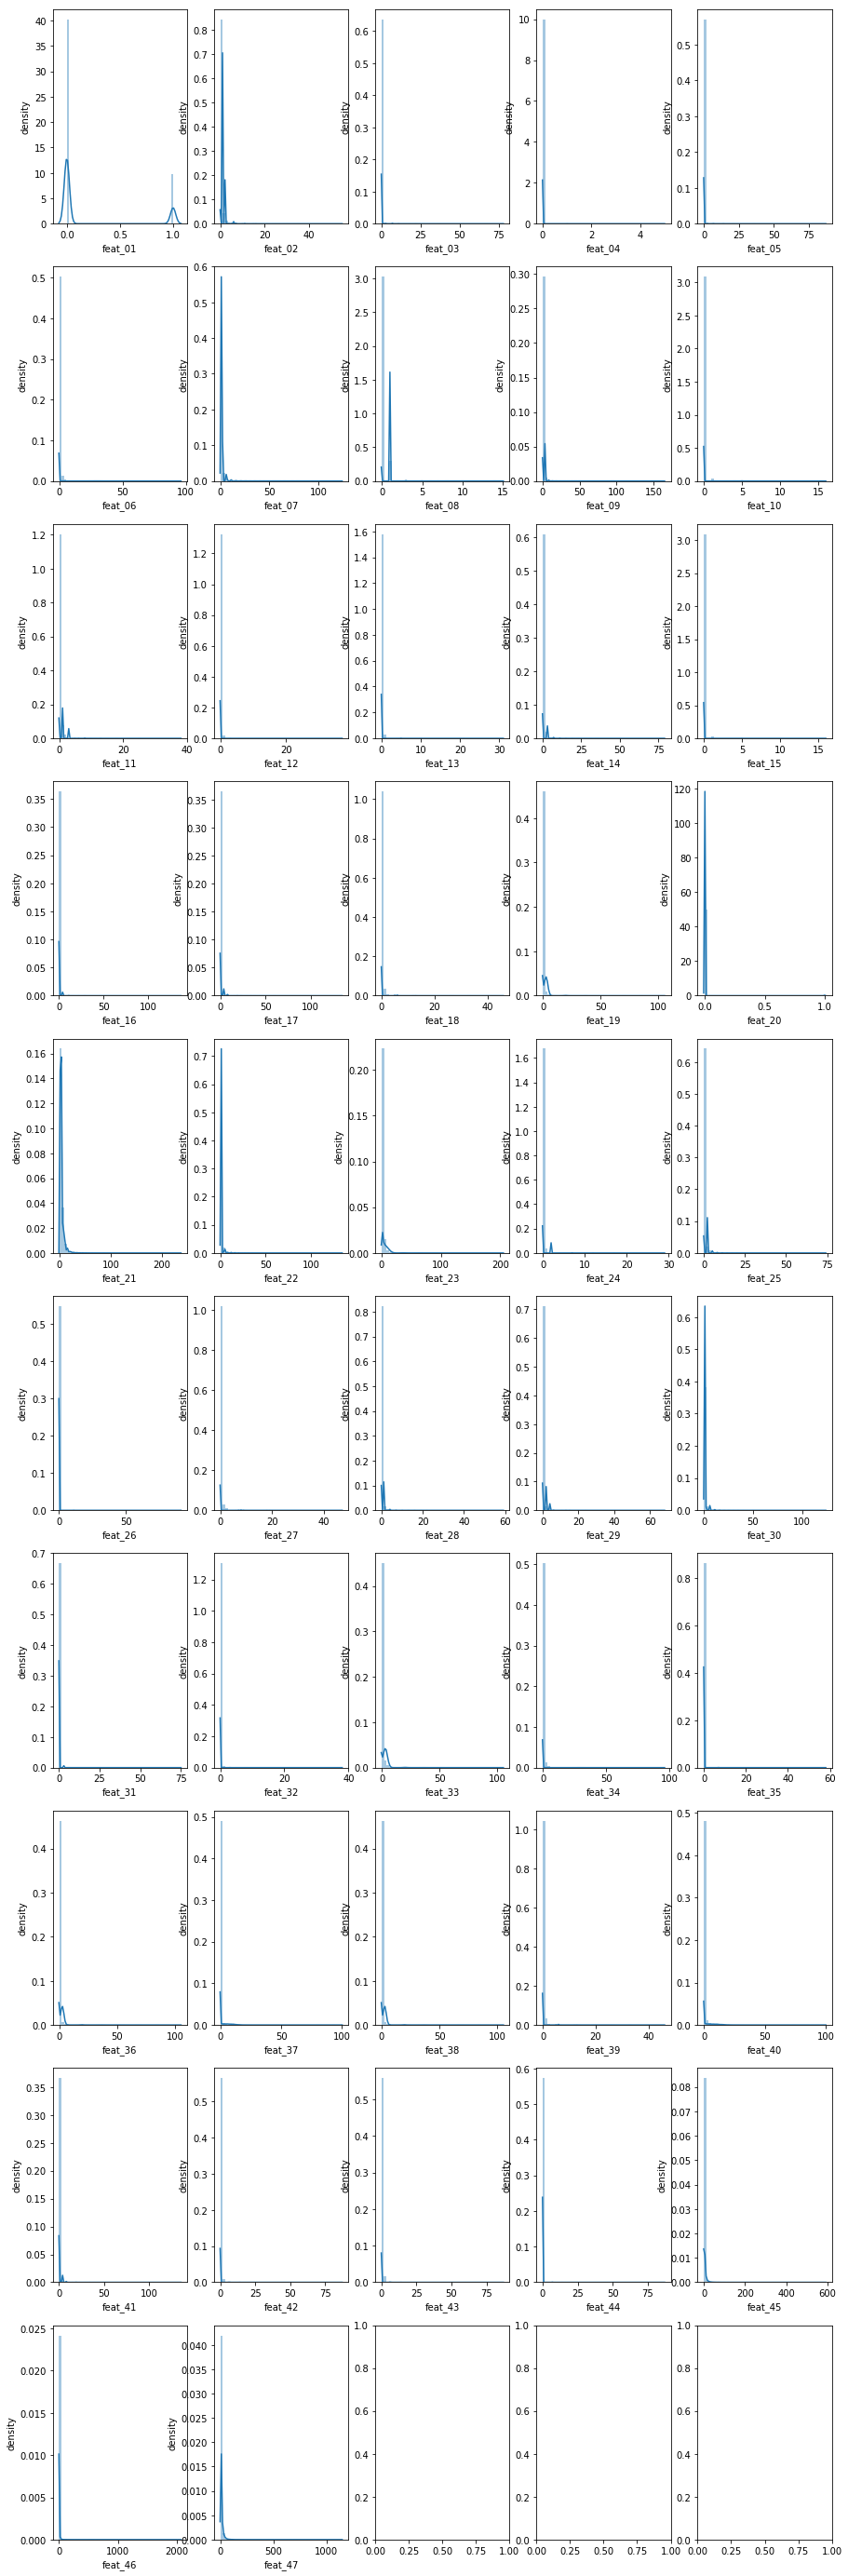

In [55]:
num_cols = 5
num_rows = 10
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows*5))
ax = axes.flatten()

for i, col in enumerate(feature_cols):   
    sns.distplot(data[col], ax=ax[i], norm_hist=True)
    ax[i].set_xlabel(col)
    ax[i].set_ylabel("density")

### Features vs target

Let's see the relation between the target and the features

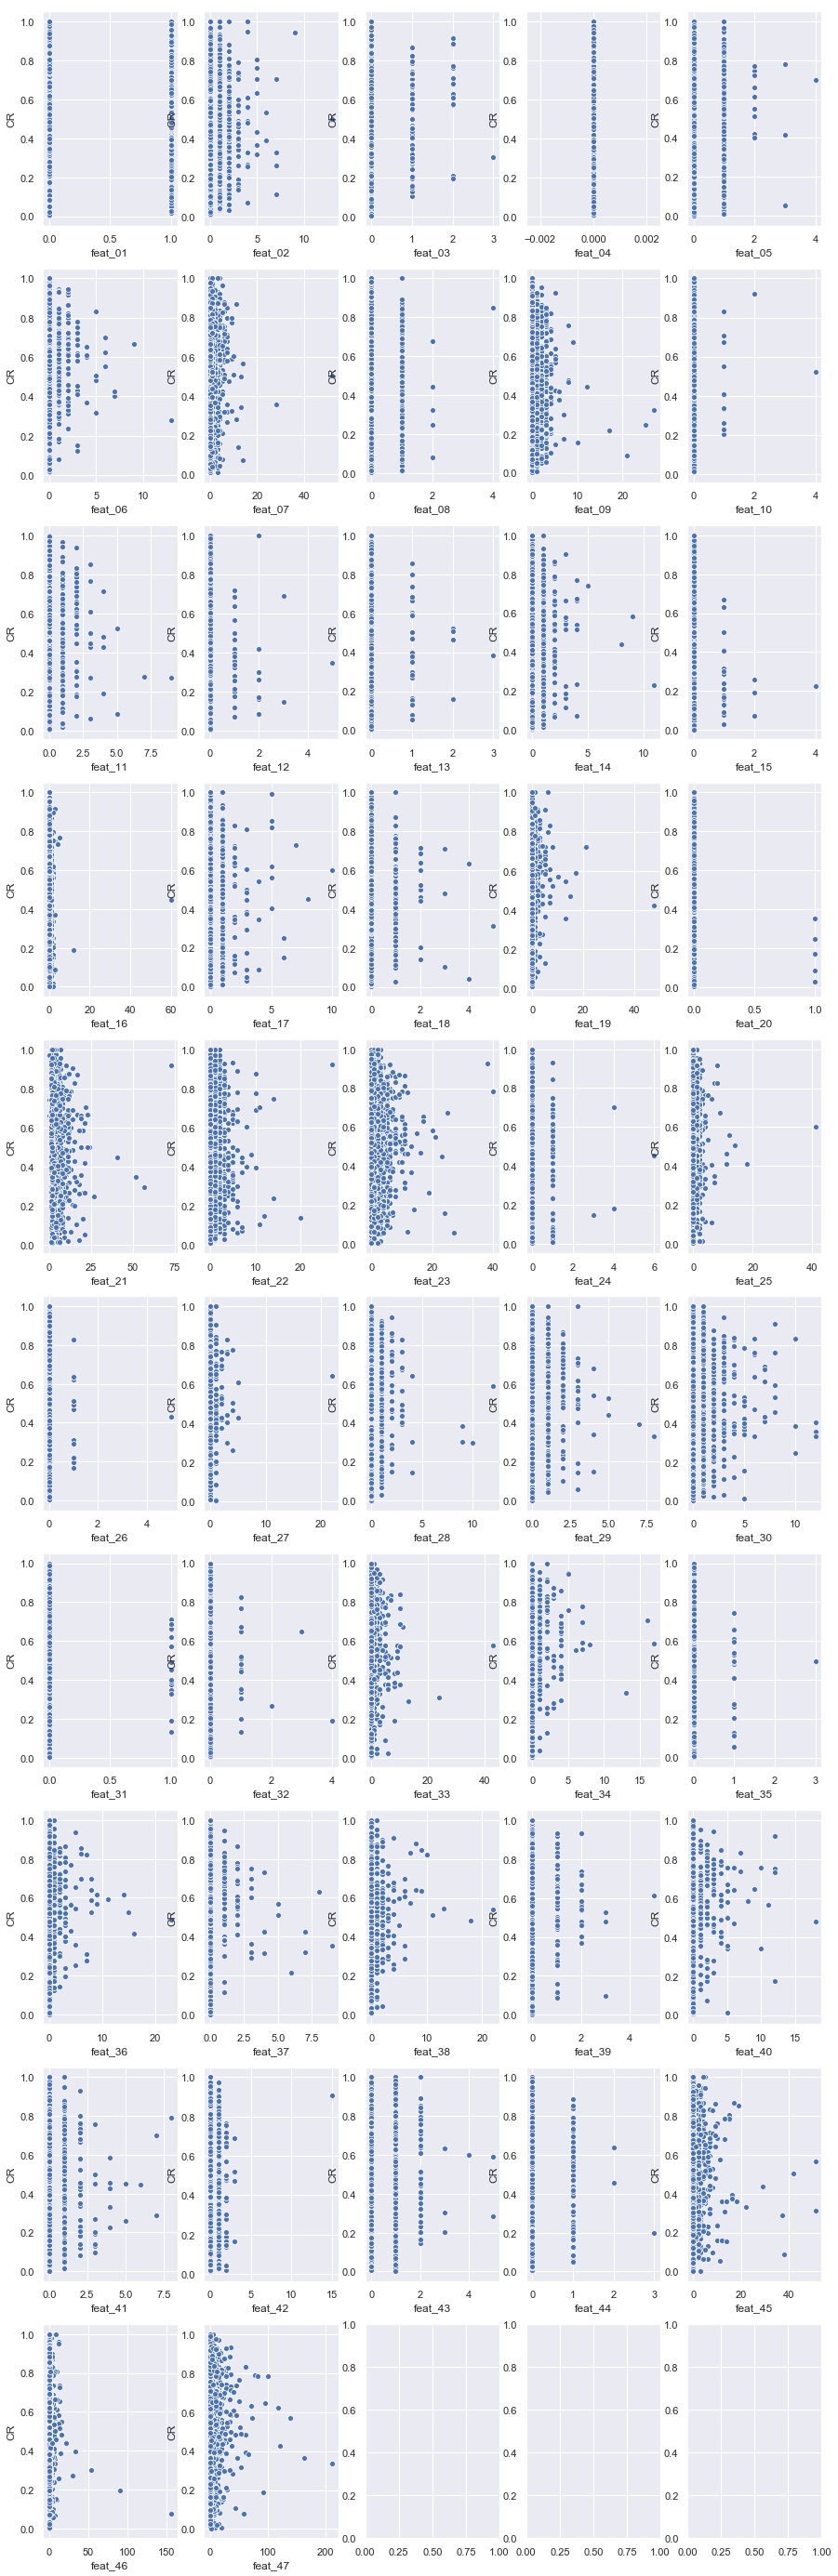

In [72]:
num_cols = 5
num_rows = 10
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows*5))
ax = axes.flatten()

for i, col in enumerate(feature_cols):
    tmp = data[col].sample(2000)
    sns.scatterplot(x=tmp, y=data["CR"], ax=ax[i])
    ax[i].set_xlabel(col)
    ax[i].set_ylabel("CR")

Plot the correlation between columns. Some columns are correlated between them. There is not a column that is hightly correlated to the target.

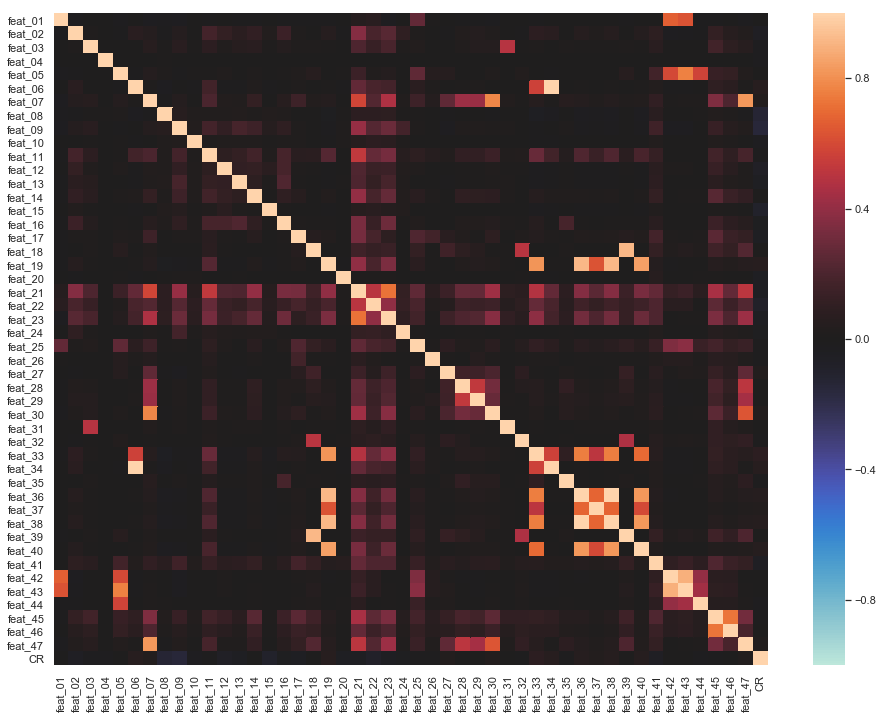

In [79]:
sns.set(rc={"figure.figsize":(16,12)})
sns.heatmap(data[[c for c in data.columns if c not in ["form_id", "views", "submissions"]]].corr(),
            vmin=-1, vmax=1, center=0)

### Feature transformation

Lets see if we can achieve a better feature to target correlation by applaying transformations to the features

Since the feature distributions are so skeewed we will apply a log transform.

In [83]:
binary_features = ["feat_01", "feat_20"]
not_binary_features = [f for f in feature_cols if f not in binary_features]
log_features = ["log_" + c for c in not_binary_features]

##### Log transform

In [85]:
for f in not_binary_features:
    data["log_" + f] = np.log(data[f] + 1) # Add 1 so we don't have values between 0 and 1 

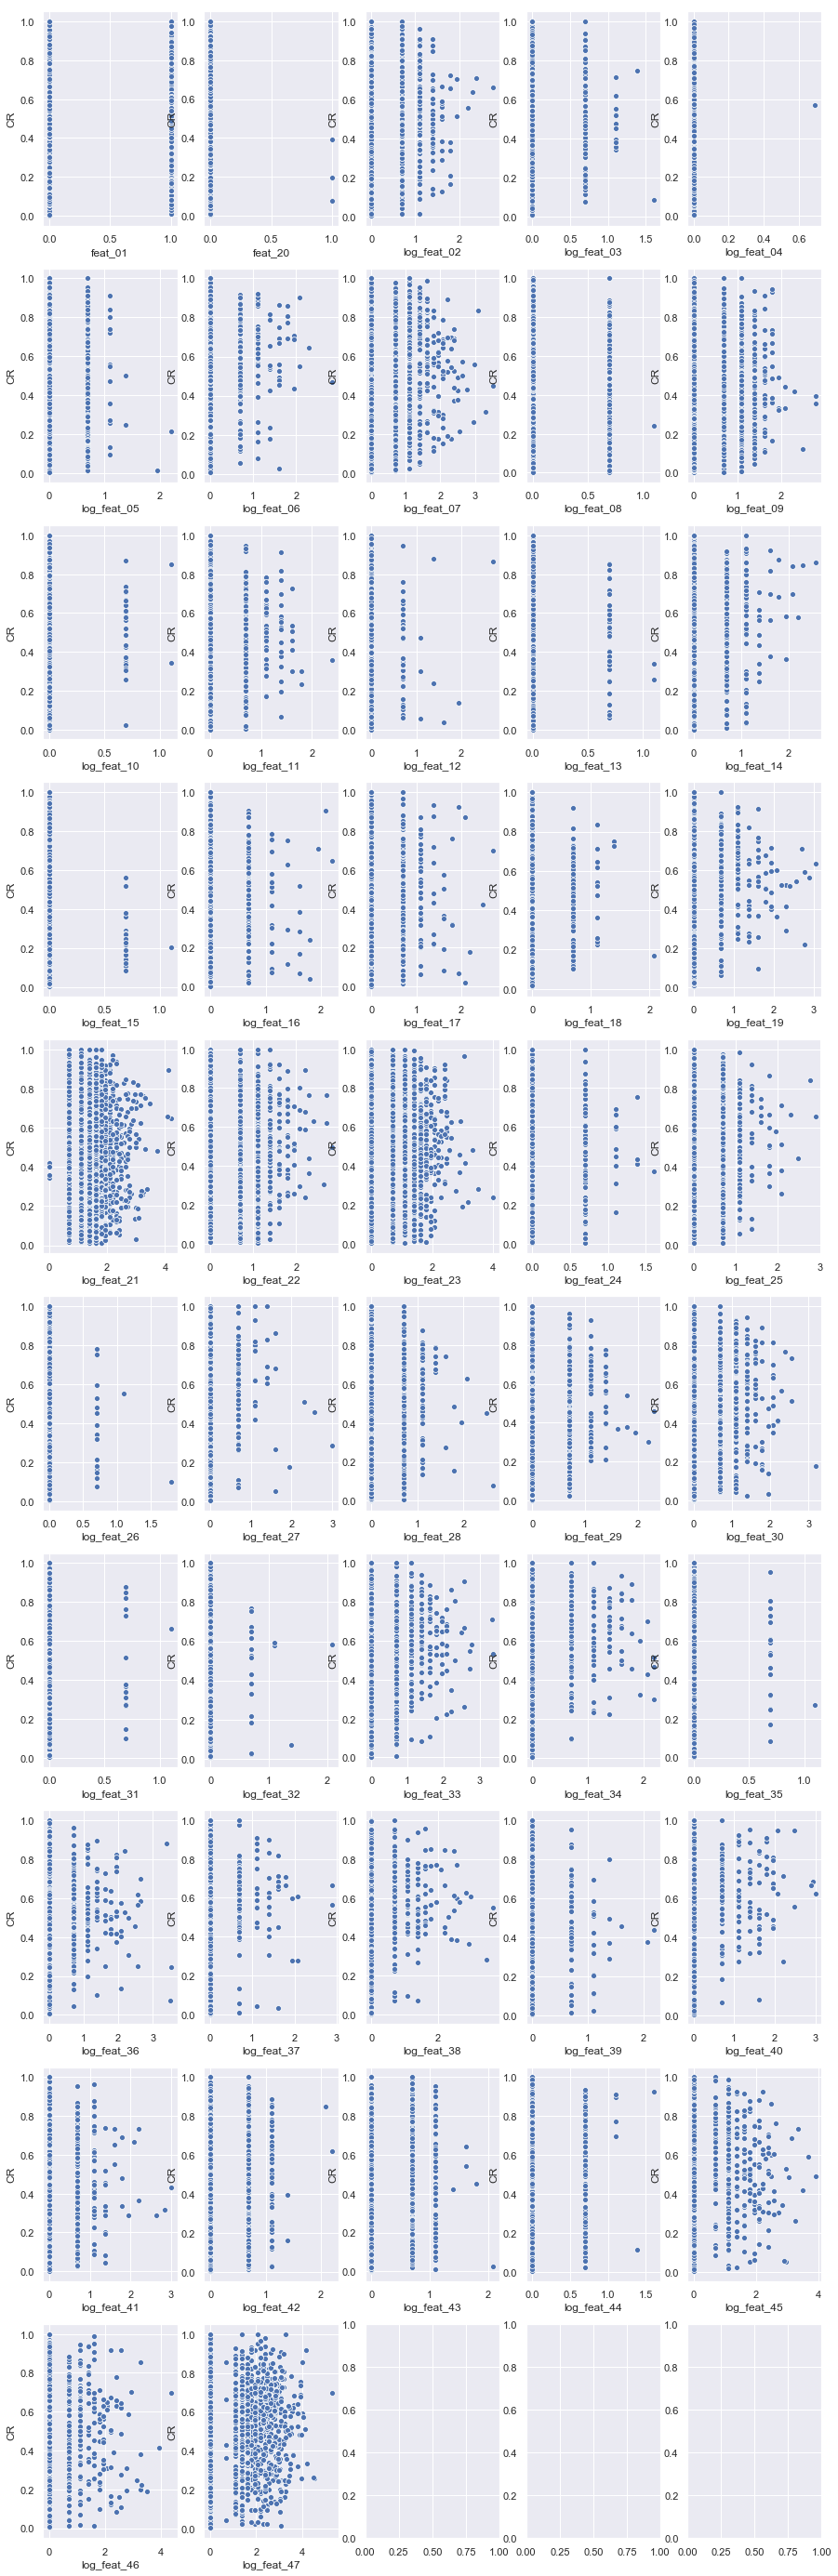

In [86]:
num_cols = 5
num_rows = 10
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows*5))
ax = axes.flatten()

for i, col in enumerate(binary_features + log_features):
    tmp = data[col].sample(2000)
    sns.scatterplot(x=tmp, y=data["CR"], ax=ax[i])
    ax[i].set_xlabel(col)
    ax[i].set_ylabel("CR")

#### Polynomial transform

Let's see the results of using a polynomial transformation

In [105]:
from sklearn.preprocessing import PolynomialFeatures

pol_fetures_transformer = PolynomialFeatures(degree=2)

In [106]:
sample_data = data[["CR"] + binary_features + log_features].sample(2000)

In [107]:
sample_data.shape

(2000, 48)

In [108]:
pol_features = pd.DataFrame(pol_fetures_transformer.fit_transform(sample_data.drop("CR", axis=1)))

In [109]:
pol_features.shape

(2000, 1176)

In [110]:
pol_features["CR"] = sample_data["CR"].copy()

In [111]:
pol_features.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668,669,670,671,672,673,674,675,676,677,678,679,680,681,682,683,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,704,705,706,707,708,709,710,711,712,713,714,715,716,717,718,719,720,721,722,723,724,725,726,727,728,729,730,731,732,733,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784,785,786,787,788,789,790,791,792,793,794,795,796,797,798,799,800,801,802,803,804,805,806,807,808,809,810,811,812,813,814,815,816,817,818,819,820,821,822,823,824,825,826,827,828,829,830,831,832,833,834,835,836,837,838,839,840,841,842,843,844,845,846,847,848,849,850,851,852,853,854,855,856,857,858,859,860,861,862,863,864,865,866,867,868,869,870,871,872,873,874,875,876,877,878,879,880,881,882,883,884,885,886,887,888,889,890,891,892,893,894,895,896,897,898,899,900,901,902,903,904,905,906,907,908,909,910,911,912,913,914,915,916,917,918,919,920,921,922,923,924,925,926,927,928,929,930,931,932,933,934,935,936,937,938,939,940,941,942,943,944,945,946,947,948,949,950,951,952,953,954,955,956,957,958,959,960,961,962,963,964,965,966,967,968,969,970,971,972,973,974,975,976,977,978,979,980,981,982,983,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999,1000,1001,1002,1003,1004,1005,1006,1007,1008,1009,1010,1011,1012,1013,1014,1015,1016,1017,1018,1019,1020,1021

This transformation converts 48 features to 1176 featrues. A lot of the new features have 0s. The new features are negatively correlated witht the target.

In [124]:
import math

top_n = 50
correlations = []
for col in pol_features.columns:
    c = pol_features[col].corr(pol_features["CR"])
    if not math.isnan(c):
        correlations.append((col, abs(c), np.sign(c)))
        
correlations.sort(key= lambda x:x[1], reverse=True)
correlations[:top_n]

[('CR', 1.0, 1.0),
 (371, 0.7841562690126648, -1.0),
 (369, 0.7841077397061531, -1.0),
 (395, 0.7837484162336325, -1.0),
 (356, 0.7797387002431322, -1.0),
 (8, 0.7767312047280684, -1.0),
 (376, 0.7767312047280683, -1.0),
 (377, 0.7767312047280683, -1.0),
 (824, 0.7709541270152994, -1.0),
 (875, 0.7614421808386714, -1.0),
 (1175, 0.7551479515306613, -1.0),
 (273, 0.7506210932512861, -1.0),
 (275, 0.7506210932512861, -1.0),
 (277, 0.7506210932512861, -1.0),
 (278, 0.7506210932512861, -1.0),
 (280, 0.7506210932512861, -1.0),
 (288, 0.7506210932512861, -1.0),
 (289, 0.7506210932512861, -1.0),
 (290, 0.7506210932512861, -1.0),
 (295, 0.7506210932512861, -1.0),
 (296, 0.7506210932512861, -1.0),
 (310, 0.7506210932512861, -1.0),
 (359, 0.7506210932512861, -1.0),
 (361, 0.7506210932512861, -1.0),
 (370, 0.7506210932512861, -1.0),
 (391, 0.7506210932512861, -1.0),
 (436, 0.7506210932512861, -1.0),
 (438, 0.7506210932512861, -1.0),
 (468, 0.7506210932512861, -1.0),
 (473, 0.7506210932512861, -1.